<a href="https://colab.research.google.com/github/omertoycu/Deep-Learning/blob/main/Keras_G%C3%B6r%C3%BCnt%C3%BC_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

# **MODEL**

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

In [ ]:
hidden1 = model.layers[1]

In [ ]:
weights, baises = hidden1.get_weights()

In [ ]:
weights

array([[ 0.03514103, -0.02329699,  0.04805098, ...,  0.00771107,
         0.03001261, -0.03056764],
       [-0.0416245 ,  0.01498781, -0.02784008, ..., -0.03956487,
        -0.01504007,  0.02312768],
       [-0.04595585,  0.05910376, -0.00641026, ...,  0.0530273 ,
        -0.02787463, -0.0310232 ],
       ...,
       [ 0.06594042,  0.00288776,  0.02607869, ...,  0.0493182 ,
         0.03592602, -0.02099578],
       [-0.05968759, -0.07098198, -0.04318282, ...,  0.03067242,
         0.00373905, -0.0354417 ],
       [-0.03169875, -0.03307883, -0.00714321, ...,  0.06384593,
        -0.07024641, -0.02266311]], dtype=float32)

In [ ]:
baises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

# **TRAİNİNG**

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6882 - loss: 1.0201 - val_accuracy: 0.8296 - val_loss: 0.5040
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8260 - loss: 0.5083 - val_accuracy: 0.8444 - val_loss: 0.4541
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8435 - loss: 0.4550 - val_accuracy: 0.8470 - val_loss: 0.4314
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8527 - loss: 0.4245 - val_accuracy: 0.8514 - val_loss: 0.4166
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8594 - loss: 0.4025 - val_accuracy: 0.8560 - val_loss: 0.4043
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.3854 - val_accuracy: 0.8590 - val_loss: 0.3933
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8696 - loss: 0.3711 - val_accuracy: 0.8606 - val_loss: 0.3859
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8730 - loss: 0.3587

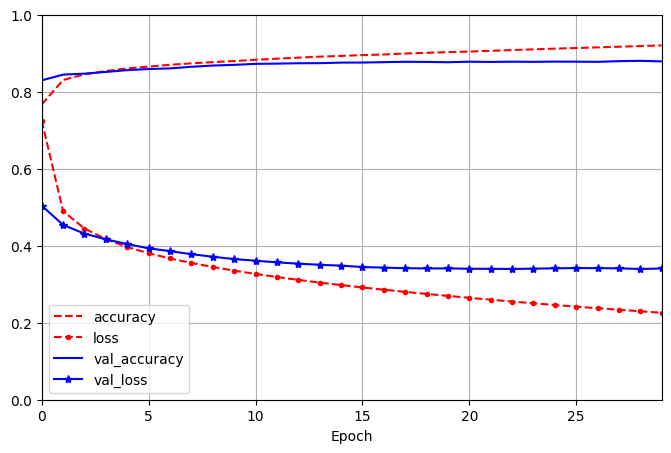

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid= True,
                                   xlabel= "Epoch",
                                   style = ["r--","r--.","b-","b-*"])
plt.show()

# **Model Evaluation**

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 0.3600


[0.3588317036628723, 0.8744000196456909]

# **Data Prediction**

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.01, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')